In [1]:
import os
from tramdag import TramDagModel, TramDagConfig

In [2]:
cfg=TramDagConfig()
cfg.setup_configuration(EXPERIMENT_DIR='counterf') # works also without arguments, then default paths are used

Configuration already exists: counterf\configuration.json


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


n = 1000

x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = np.random.choice([0,1], size=n)
x3 = np.random.choice([0,1,2], size=n)
x4 = np.random.exponential(scale=1.0, size=n)
x5 = np.random.choice([0,1,2,3], size=n)
x6 = np.random.exponential(scale=1.0, size=n)
x7 = np.random.choice([0,1,2,3,4], size=n)


df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": x3,
    "x4": x4,
    "x5": x5,
    "x6": x6,
    "x7": x7,
})

print(df.head())


# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

         x1  x2  x3        x4  x5        x6  x7
0 -1.196990   1   0  0.369061   0  0.076116   0
1  0.940813   0   0  0.289095   1  0.797779   2
2 -0.405019   1   1  3.138530   2  1.943284   4
3 -0.675674   1   0  0.159547   1  0.320588   2
4 -0.368065   1   0  1.223869   2  0.862445   4


In [4]:
# here you need to specify which varibles are in the graph and what type they are (continous or ordinal) for the model builder 
data_type= {'x1':'continous',
            'x2':'ordinal_Xn_Yo', 
            'x3':'ordinal_Xn_Yo',
            'x4':'continous',
            'x5':'ordinal_Xn_Yo',
            'x6':'continous',
            'x7':'ordinal_Xn_Yo',} 

cfg.set_data_type(data_type)

---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
x1                   | continous       | continuous [c]                 | continuous [c]                
x2                   | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
x3                   | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
x4                   | continous       | continuous [c]                 | continuous [c]                
x5                   | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
x6                   | continous       | continuous [c]  

c:\Users\donald_duck\TramDag\tramdag\utils\configuration.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


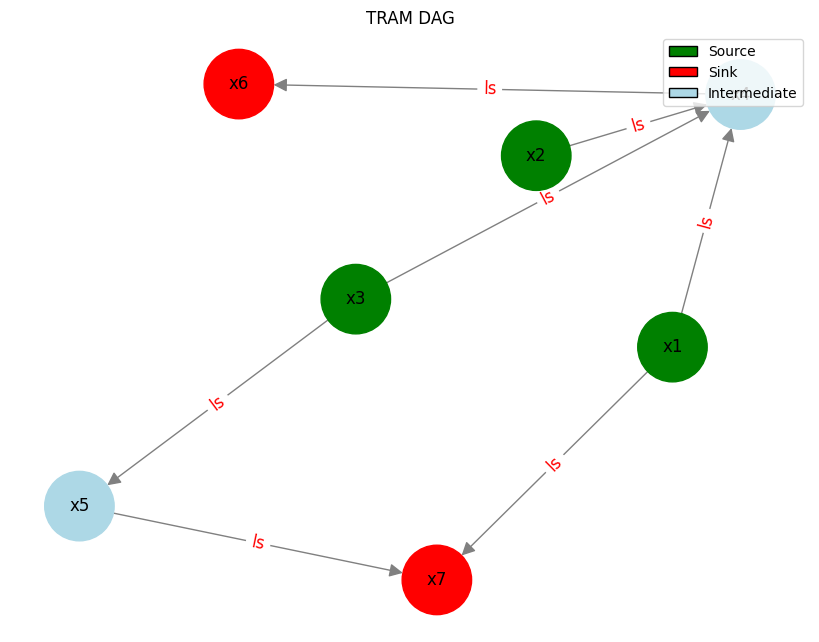

In [5]:
cfg.set_meta_adj_matrix(seed=123) #Create the (Meta) Adjacency Matrix

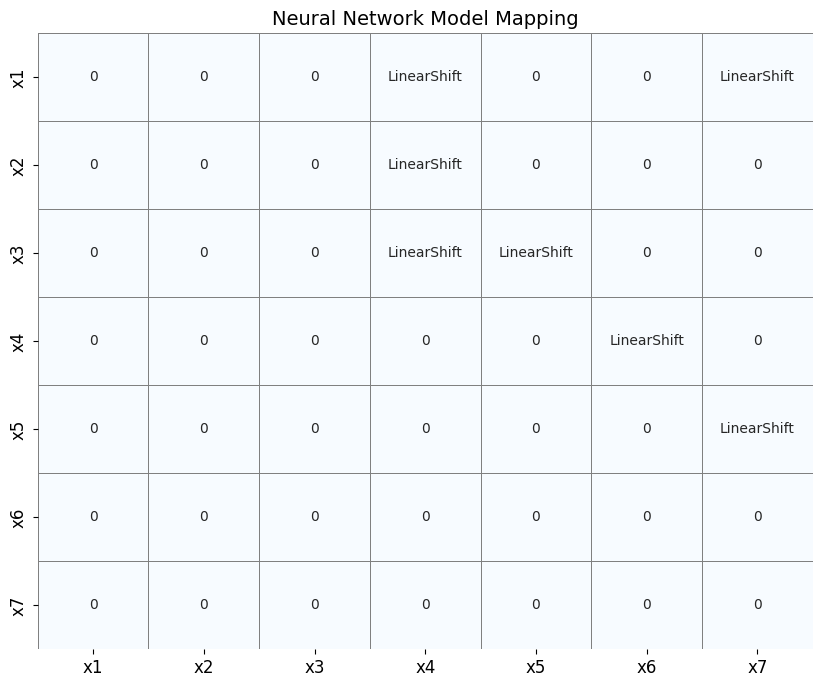

In [6]:
cfg.set_tramdag_nn_models() 


In [7]:
cfg.compute_levels(train_df)

In [8]:
from tramdag import TramDagModel
device='cpu'
td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=False,device=device,initial_data =train_df )

In [9]:
td_model.load_or_compute_minmax(td_train_data=train_df)

[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to counterf\min_max_scaling.json


In [10]:
sub = test_df.sample(n=3, random_state=42)
sub

,x1,x2,x3,x4,x5,x6,x7
365,0.014906,0,1,1.820109,0,0.736876,3
583,-2.011921,0,0,0.084042,0,0.350041,3
879,0.478357,0,0,3.012360,1,1.058472,3


In [11]:
u_df = td_model.get_latent(sub)

[Warning] best_model.pt not found, falling back to initial_model.pt


c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[Warning] best_model.pt not found, using initial_model.pt
[WARNING] Ordinal 'x3' has 2 unique values, expected 3. Skipping strict comparison.
[Warning] best_model.pt not found, using initial_model.pt
[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 2 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.int64(0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.int64(0), np.int64(1)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 2 unique values, expected 3. Skipping strict comparison.
[Warning] best_model.pt not found, falling back to initial_mode

In [12]:
u_df

,x1,x1_U,x2,x2_U_lower,x2_U_upper,x3,x3_U_lower,x3_U_upper,x4,x4_U,x5,x5_U_lower,x5_U_upper,x6,x6_U,x7,x7_U_lower,x7_U_upper
365,0.014906,-0.011945,0,-inf,0.92022,1,-0.605174,1.863768,1.820109,-0.394370,0,-inf,-0.335095,0.736876,-0.158830,3,2.607728,4.998375
583,-2.011921,-0.379891,0,-inf,0.92022,0,-inf,-0.605174,0.084042,0.216933,0,-inf,-0.344913,0.350041,-0.229819,3,4.560006,6.950653
879,0.478357,0.077348,0,-inf,0.92022,0,-inf,-0.605174,3.012360,-0.604055,1,-0.344913,0.091860,1.058472,-0.076215,3,1.929949,4.320597


In [13]:
samples, latents = td_model.sample(predefined_latent_samples_df=u_df,number_of_counterfactual_samples=100)

[INFO] Starting full DAG sampling with 10000 samples per node.
[INFO] Using predefined latents samples from dataframe -> therefore n_samples is set to the number of rows in the dataframe: 3
[INFO] Deleting all previously sampled data.
Deleted directory: counterf\x1\sampling
Deleted directory: counterf\x2\sampling
Deleted directory: counterf\x3\sampling
Deleted directory: counterf\x4\sampling
Directory does not exist: counterf\x5\sampling
Directory does not exist: counterf\x6\sampling
Directory does not exist: counterf\x7\sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x1'. Using initial weights instead.
[INFO] Using predefined latents samples for node x1 from dataframe column: x1_U


c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[INFO] Chandrupatla root finding ->  iterations::  32%|███▏      | 32/100 [00:00<00:00, 863.84it/s]


[INFO] Completed sampling for node 'x1'

----*----------*-------------*--------Sample Node: x2 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x2'. Using initial weights instead.
[INFO] Detected 'x2_U_lower' and 'x2_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x2: 100%|██████████| 3/3 [00:19<00:00,  6.36s/it]


[INFO] Completed sampling for node 'x2'

----*----------*-------------*--------Sample Node: x3 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x3'. Using initial weights instead.
[INFO] Detected 'x3_U_lower' and 'x3_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x3: 100%|██████████| 3/3 [00:19<00:00,  6.40s/it]


[INFO] Completed sampling for node 'x3'

----*----------*-------------*--------Sample Node: x4 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x4'. Using initial weights instead.
[INFO] Using predefined latents samples for node x4 from dataframe column: x4_U


Sampling x4:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(1.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4:  33%|███▎      | 1/3 [00:06<00:13,  6.89s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4:  67%|██████▋   | 2/3 [00:13<00:06,  6.83s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x2' has 1 unique values in data but is configured for 2 levels — using configured value.
[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x2' has only observed levels [np.float64(0.0)] but is configured for 2 — keeping encoding dimension 2.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x2' has 1 unique values, expected 2. Skipping strict comparison.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x4: 100%|██████████| 3/3 [00:20<00:00,  6.79s/it]


[INFO] Completed sampling for node 'x4'

----*----------*-------------*--------Sample Node: x5 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x5'. Using initial weights instead.
[INFO] Detected 'x5_U_lower' and 'x5_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x5:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(1.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5:  33%|███▎      | 1/3 [00:06<00:12,  6.35s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5:  67%|██████▋   | 2/3 [00:12<00:06,  6.48s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x3' has 1 unique values in data but is configured for 3 levels — using configured value.
[WARNING] Ordinal predictor 'x3' has only observed levels [np.float64(0.0)] but is configured for 3 — keeping encoding dimension 3.
[WARNING] Ordinal 'x3' has 1 unique values, expected 3. Skipping strict comparison.


Sampling x5: 100%|██████████| 3/3 [00:19<00:00,  6.51s/it]


[INFO] Completed sampling for node 'x5'

----*----------*-------------*--------Sample Node: x6 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x6'. Using initial weights instead.
[INFO] Using predefined latents samples for node x6 from dataframe column: x6_U


Sampling x6:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6:  33%|███▎      | 1/3 [00:06<00:13,  6.70s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6:  67%|██████▋   | 2/3 [00:13<00:06,  6.64s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Sampling x6: 100%|██████████| 3/3 [00:20<00:00,  6.

[INFO] Completed sampling for node 'x6'

----*----------*-------------*--------Sample Node: x7 ------------*-----------------*-------------------*--
[WARNING] Best model not found for node 'x7'. Using initial weights instead.
[INFO] Detected 'x7_U_lower' and 'x7_U_upper' — switching to counterfactual logistic sampling mode.


Sampling x7:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(0.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7:  33%|███▎      | 1/3 [00:08<00:16,  8.10s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(0.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7:  67%|██████▋   | 2/3 [00:15<00:07,  7.92s/it]c:\Users\donald_duck\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[WARNING] Ordinal 'x5' has 1 unique values in data but is configured for 4 levels — using configured value.
[WARNING] Ordinal predictor 'x5' has only observed levels [np.float64(1.0)] but is configured for 4 — keeping encoding dimension 4.
[WARNING] Ordinal 'x5' has 1 unique values, expected 4. Skipping strict comparison.


Sampling x7: 100%|██████████| 3/3 [00:23<00:00,  7.90s/it]

[INFO] Completed sampling for node 'x7'
[INFO] DAG sampling completed successfully for all nodes.
